In [53]:
# Load the autoreload extension
%load_ext autoreload

# Automatically reload modules before executing code
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Table Retrieval Ranking

In [54]:
from pathlib import Path
from benchmark_src.results_processing.plots.plot_utils import get_task_df, get_list_of_all_runs
from benchmark_src.results_processing import ranking
from benchmark_src.results_processing.plots import table_retrieval_plots


In [55]:
results_folder = Path("../../results")
assert results_folder.exists(), f"Could not find results folder at {results_folder}"

plots_folder = results_folder / "plots" / "table_retrieval"
plots_folder.mkdir(parents=True, exist_ok=True)

In [56]:
task_df = get_task_df(results_folder=results_folder, task_name="table_retrieval")

Unique datasets (table_retrieval): 7


In [57]:
task_df.groupby(['task', 'Approach', 'Configuration'])['dataset'].nunique().reset_index(name='num_datasets')

,task,Approach,Configuration,num_datasets
0,table_retrieval,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",7
1,table_retrieval,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",7
2,table_retrieval,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_lim...",7
3,table_retrieval,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,7
4,table_retrieval,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,7


In [58]:
task_df

,Approach,Configuration,task,dataset,# Runs,total_queries_mean,MRR@1_mean,MAP@1_mean,Recall@1_mean,Precision@1_mean,...,model_setup---execution_time (s),model_setup---peak_cpu (%),model_setup---average_cpu (%),model_setup---peak_memory (MB),model_setup---average_memory (MB),task_inference---execution_time (s),task_inference---peak_cpu (%),task_inference---average_cpu (%),task_inference---peak_memory (MB),task_inference---average_memory (MB)
66,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,bird-validation,1,1534.0,0.308344,0.168514,0.160014,0.308344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,fetaqa,1,2003.0,0.515726,0.515726,0.515726,0.515726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,ottqa,1,2214.0,0.780036,0.780036,0.780036,0.780036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,spider-test,1,2147.0,0.637168,0.469454,0.406417,0.637168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,spider-train,1,6997.0,0.425611,0.307115,0.273915,0.425611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,spider-validation,1,1034.0,0.711799,0.520632,0.470288,0.711799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",table_retrieval,tabfact,1,12779.0,0.532514,0.532514,0.532514,0.532514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",table_retrieval,bird-validation,1,1534.0,0.055411,0.030476,0.028755,0.055411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",table_retrieval,fetaqa,1,2003.0,0.347479,0.347479,0.347479,0.347479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",table_retrieval,ottqa,1,2214.0,0.588979,0.588979,0.588979,0.588979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Configure which approaches to include

In [59]:
# get list as ouptput and copy it to the next cell to comment out approaches not to be plotted
get_list_of_all_runs(task_df)

include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
]


In [60]:
# Use the list to filter the original task_df
filtered_task_df = task_df


## Overview over the results -> num datasets per approach we have results for


In [61]:
# overview
filtered_task_df.groupby(['task', 'Approach', 'Configuration'])['dataset'].nunique().reset_index(name='num_datasets')


,task,Approach,Configuration,num_datasets
0,table_retrieval,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_lim...",7
1,table_retrieval,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",7
2,table_retrieval,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_lim...",7
3,table_retrieval,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,7
4,table_retrieval,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,7


## Average rank and num best datasets


In [62]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='Recall@1_mean')
# sort by "avg_rank"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style


,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
0,table_retrieval,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",4,4,"['bird-validation', 'fetaqa', 'ottqa', 'tabfact']",2.285714
4,table_retrieval,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",1,1,['spider-validation'],2.285714
1,table_retrieval,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",1,1,['spider-train'],2.571429
3,table_retrieval,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",1,1,['spider-test'],2.857143
2,table_retrieval,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],5.000000


## ELO Scores


In [63]:
task_metrics_map = ranking.build_task_metrics_map(filtered_task_df)
print("Task metrics map (scores the elo metrics are based on):", task_metrics_map)

elo_df = ranking.get_elo_scores_for_task("table_retrieval", filtered_task_df, task_metrics_map)
elo_df = elo_df.sort_values(by='elo_score_task', ascending=False)
elo_df.style


Task metrics map (scores the elo metrics are based on): {'table_retrieval': [('Recall@1_mean', True)]}
Computing ELO for task table_retrieval using metrics: [('Recall@1_mean', True)]


,task,Approach,Configuration,elo_score_task
4,table_retrieval,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",1521.270416
0,table_retrieval,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",1521.218998
1,table_retrieval,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",1512.600380
3,table_retrieval,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",1504.611092
2,table_retrieval,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",1440.299115


### ELO Scores who beats whom?


In [64]:
pairwise_df = ranking.compute_pairwise_wins(filtered_task_df, metric_col='Recall@1_mean')
pairwise_df.style


,Approach_A,Config_A,Approach_B,Config_B,num_datasets_A_beats_B
0,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",4
1,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",7
2,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",4
3,GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",4
4,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",3
5,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",7
6,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",4
7,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",3
8,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",GritLM,"embedding_model=GritLM_GritLM-7B,table_row_limit=100",0
9,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0


## Results averaged over the datasets


############## Started table retrieval barplot
               Approach                                      Configuration  \
0                GritLM  embedding_model=GritLM_GritLM-7B,table_row_lim...   
1  sentence_transformer  embedding_model=BAAI_bge-base-en-v1.5,table_ro...   
2  sentence_transformer  embedding_model=all-MiniLM-L6-v2,table_row_lim...   
3  sentence_transformer  embedding_model=ibm-granite_granite-embedding-...   
4  sentence_transformer  embedding_model=ibm-granite_granite-embedding-...   

              task  # Runs_mean  # Runs_std  total_queries_mean_mean  \
0  table_retrieval          1.0         0.0              4101.142857   
1  table_retrieval          1.0         0.0              4101.142857   
2  table_retrieval          1.0         0.0              4101.142857   
3  table_retrieval          1.0         0.0              4101.142857   
4  table_retrieval          1.0         0.0              4101.142857   

   total_queries_mean_std  MRR@1_mean_mean  MRR@1_m

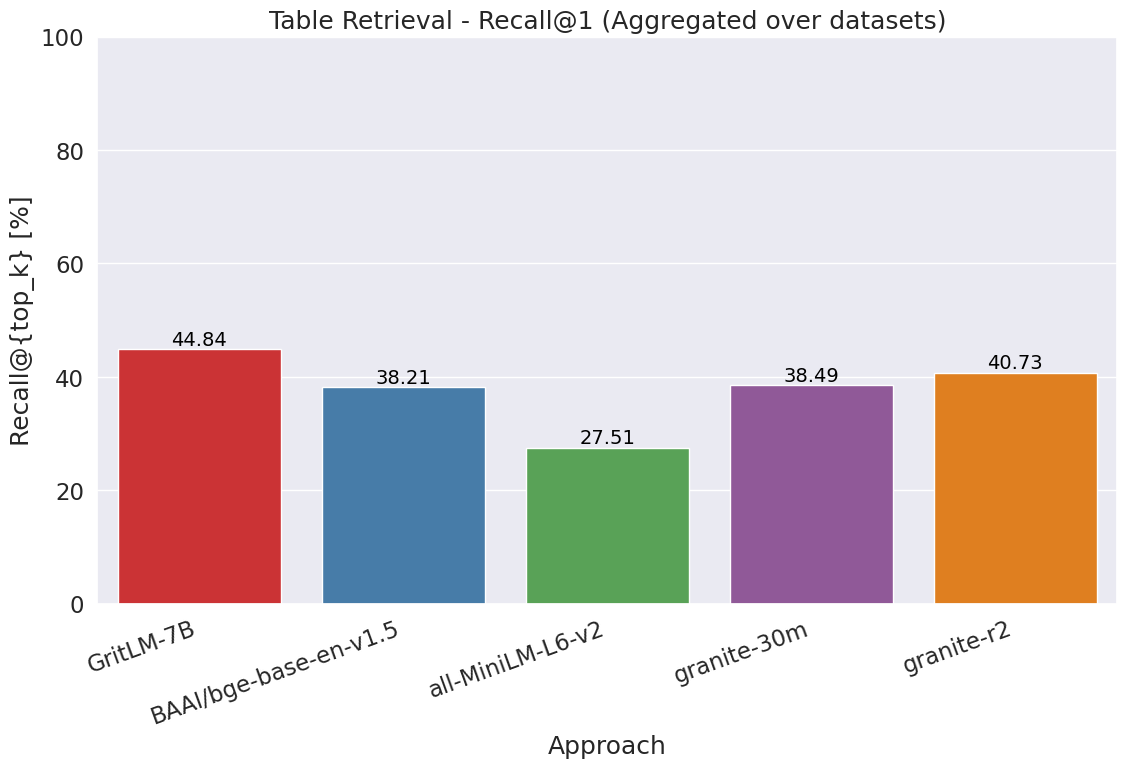

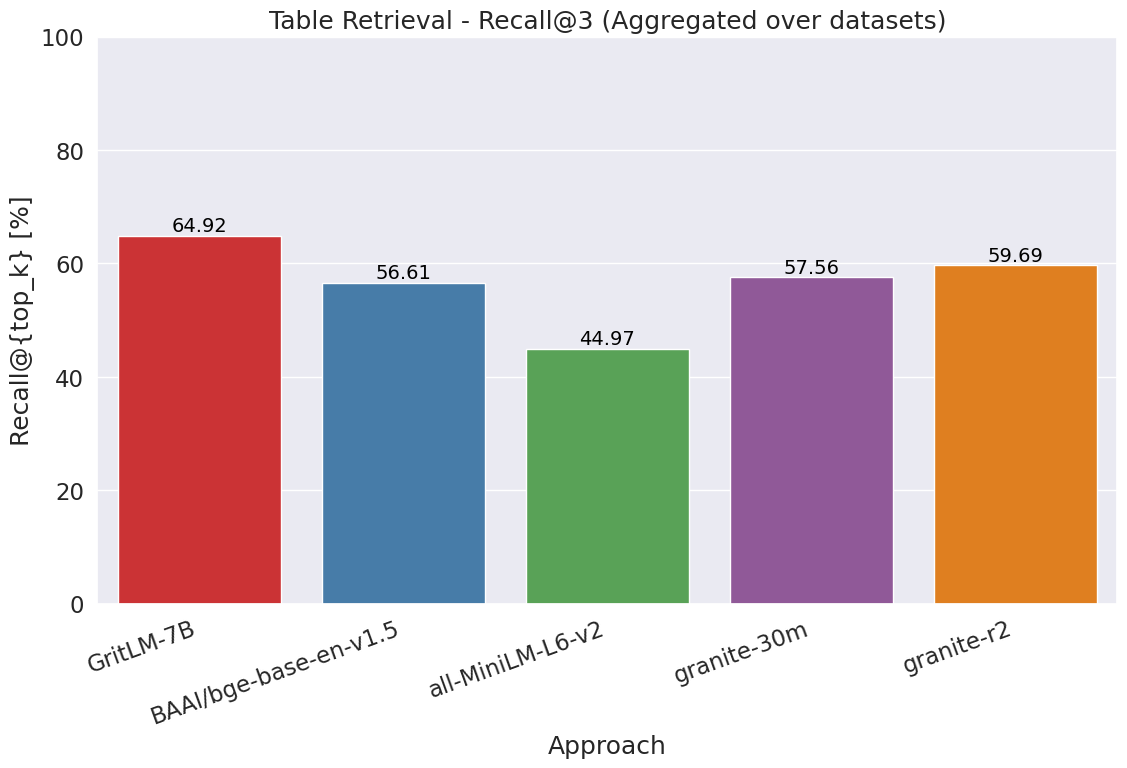

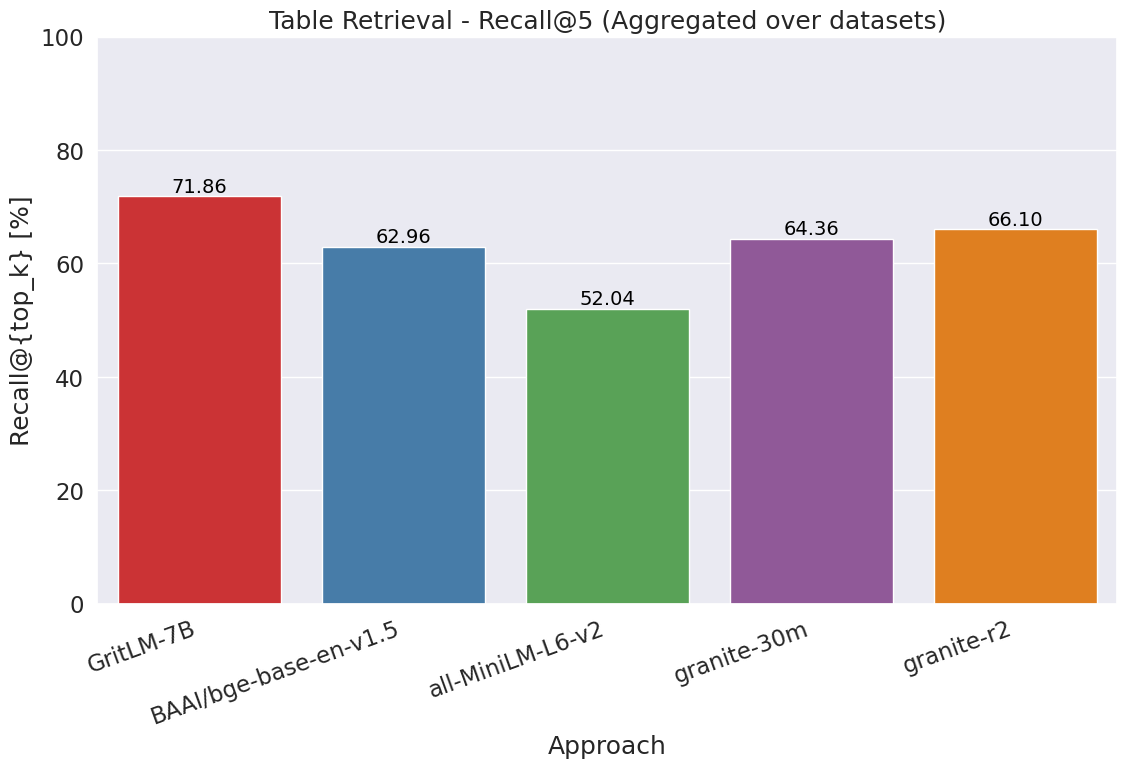

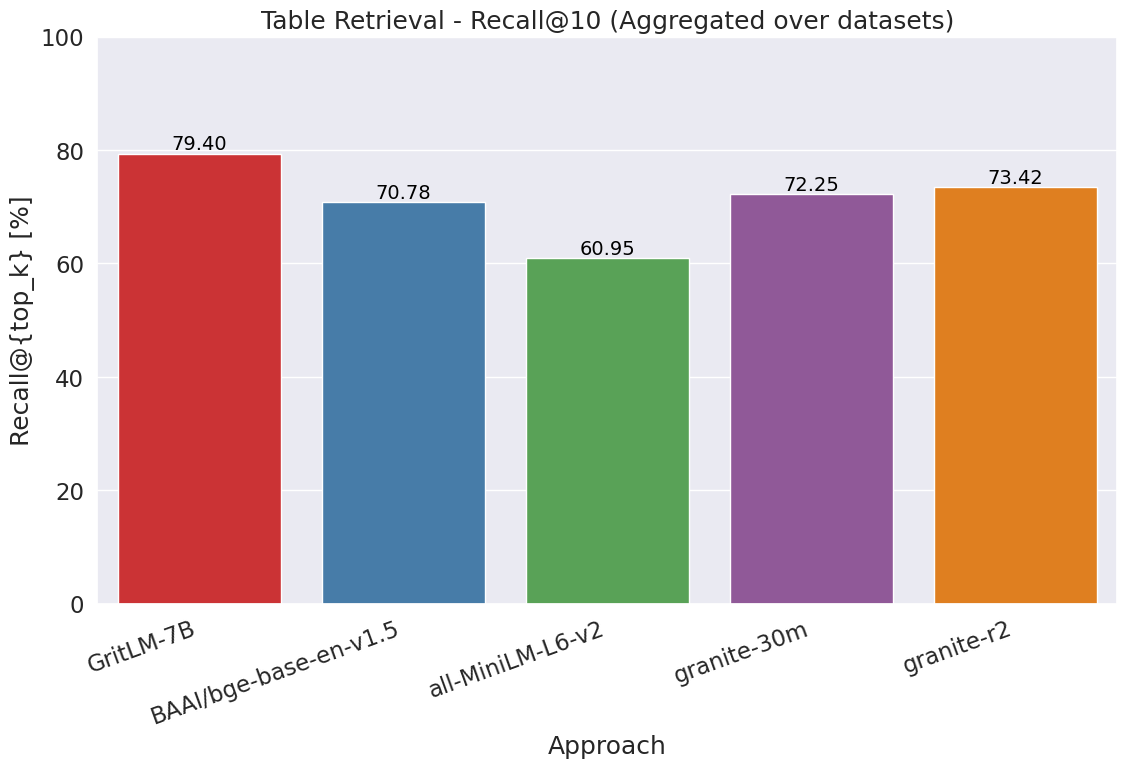

In [65]:
table_retrieval_plots.create_barplot(df=filtered_task_df, results_folder=plots_folder)


## Bar plots per dataset


############## Started table retrieval barplot datasets


/home/ayeen/uni/research/liane/table-representation-evals/benchmark_src/results_processing/plots/table_retrieval_plots.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  
/home/ayeen/uni/research/liane/table-representation-evals/benchmark_src/results_processing/plots/table_retrieval_plots.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  
/home/ayeen/uni/research/liane/table-representation-evals/benchmark_src/results_processing/plots/table_retrieval_plots.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  
/home/ayeen/uni/research/liane/table-representation-evals/benchmark_src/results_processing/plots/table_retrieval_plots.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

############## Finished table retrieval barplot datasets


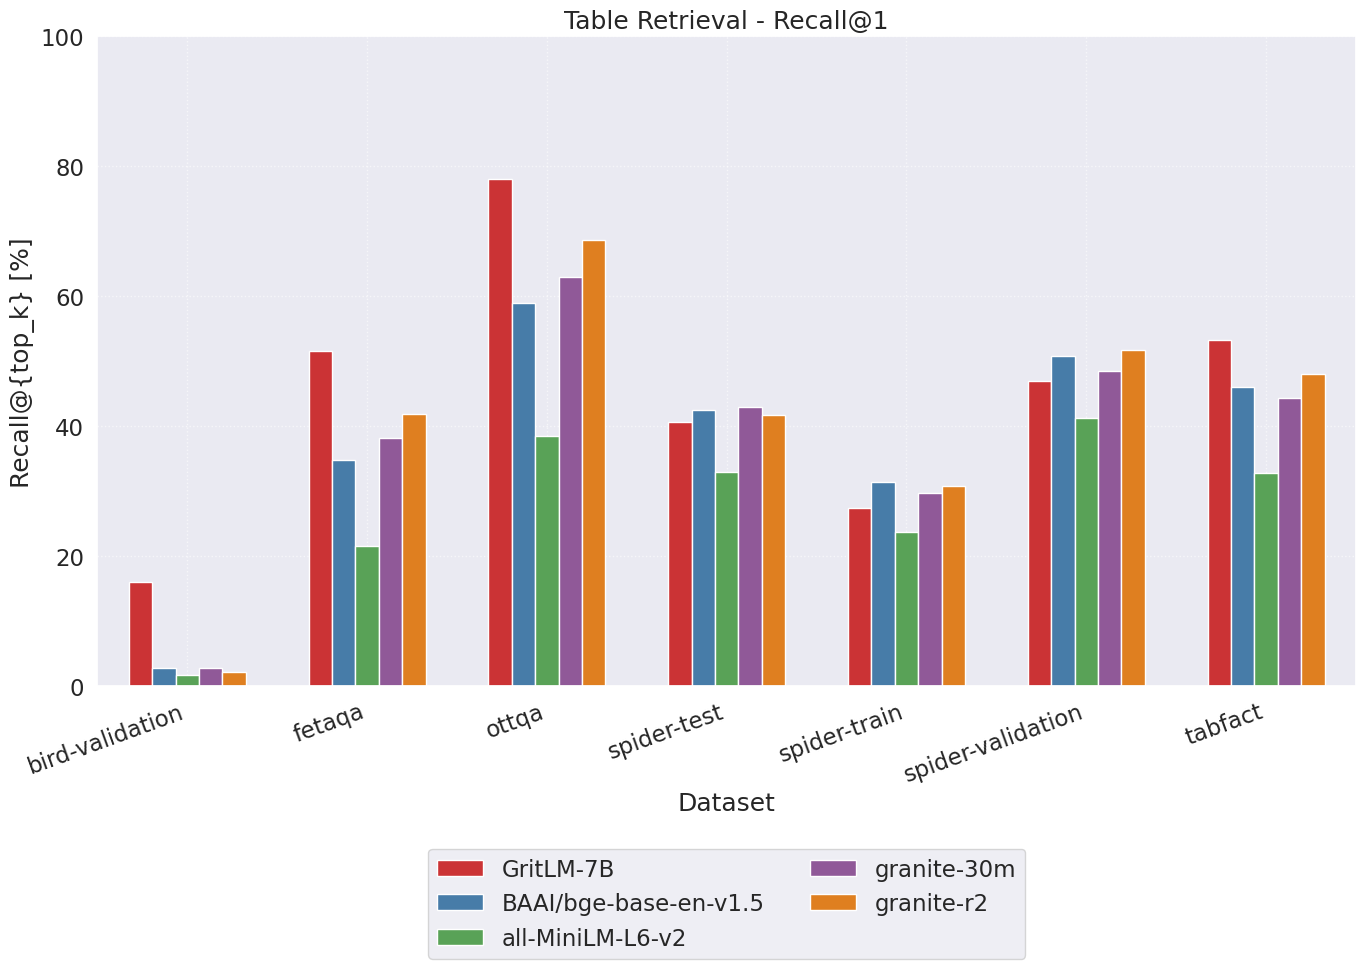

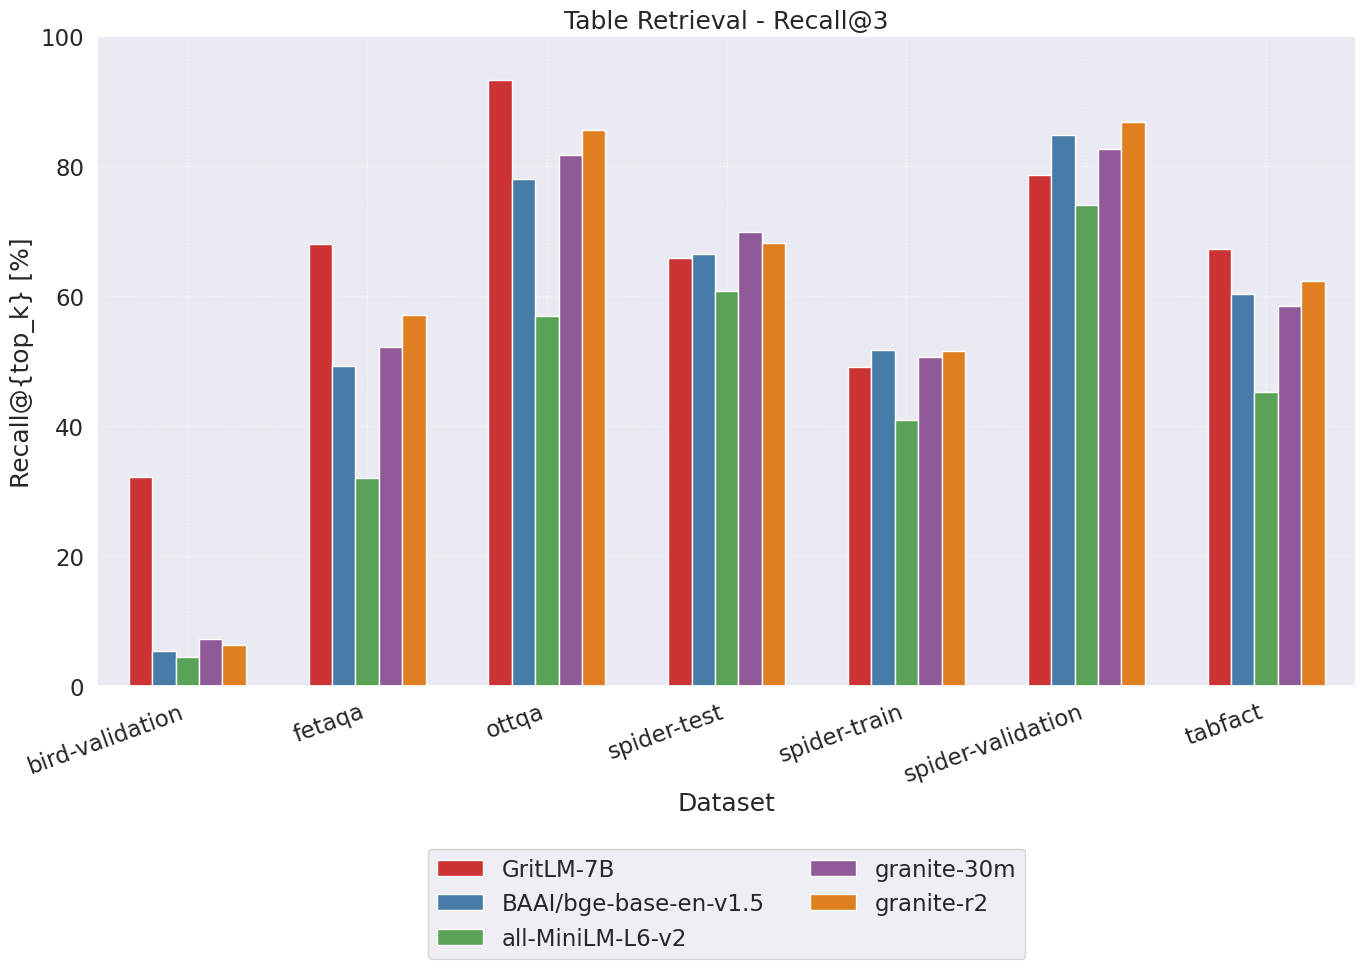

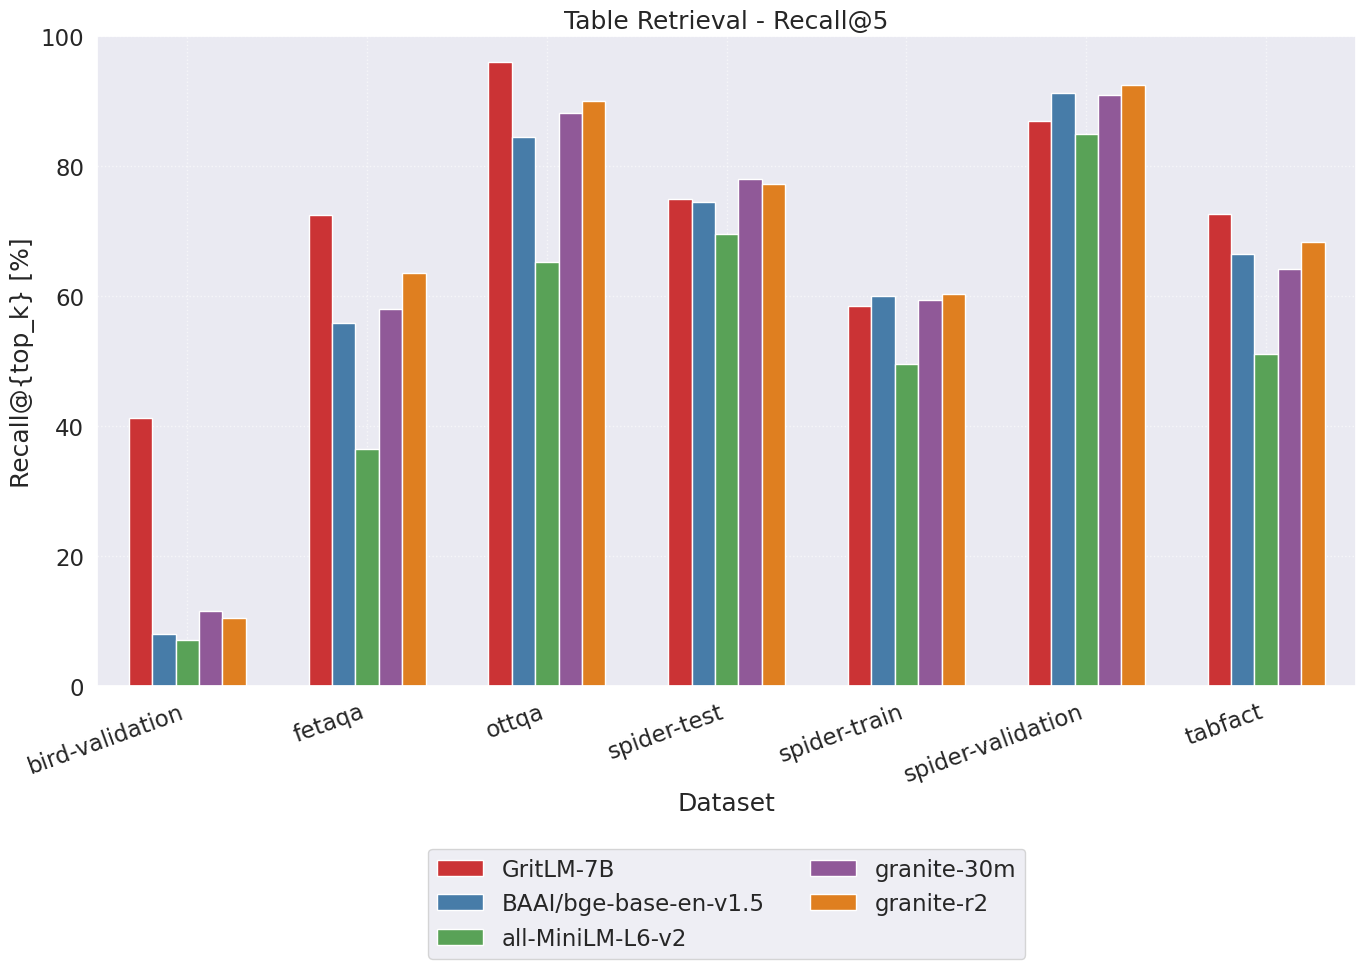

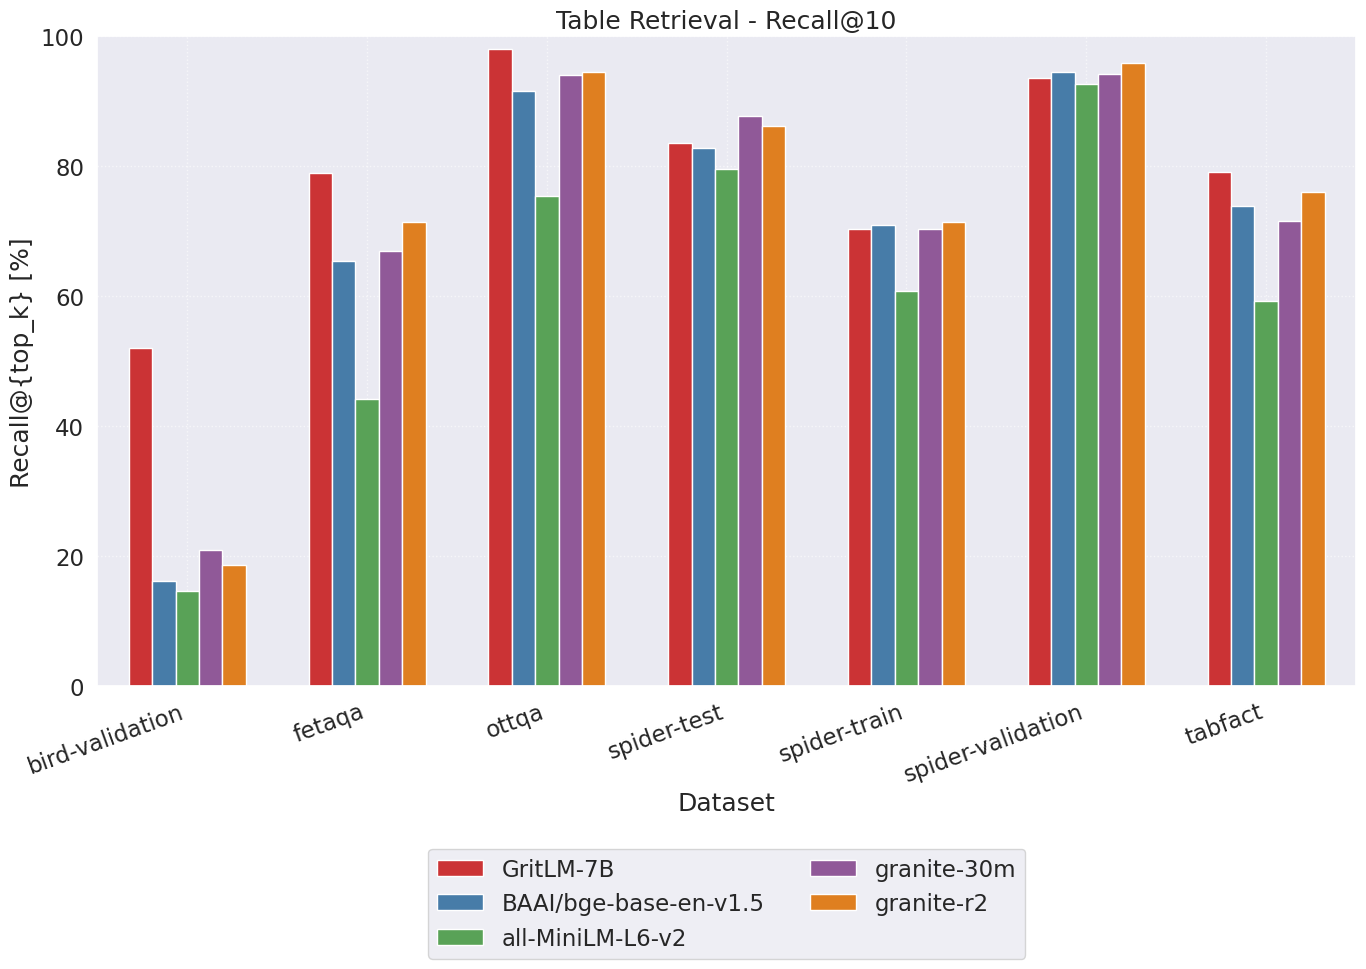

In [66]:
table_retrieval_plots.create_barplot_datasets(df=filtered_task_df, results_folder=plots_folder)


## Recall Growth Curve


############## Started recall growth curve
############## Finished recall growth curve


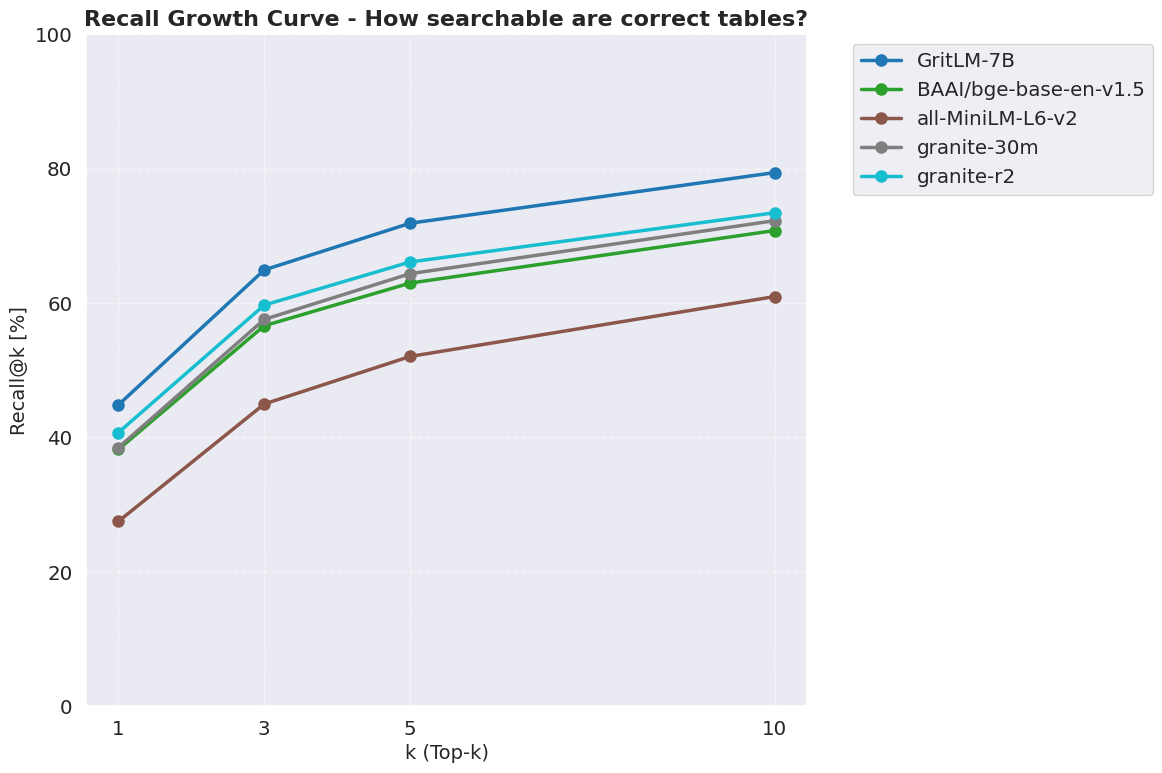

In [67]:
table_retrieval_plots.create_recall_growth_curve(df=filtered_task_df, results_folder=plots_folder)


## Model Leaderboard (MRR@10 by Dataset)


############## Started model leaderboard


<string>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


############## Finished model leaderboard


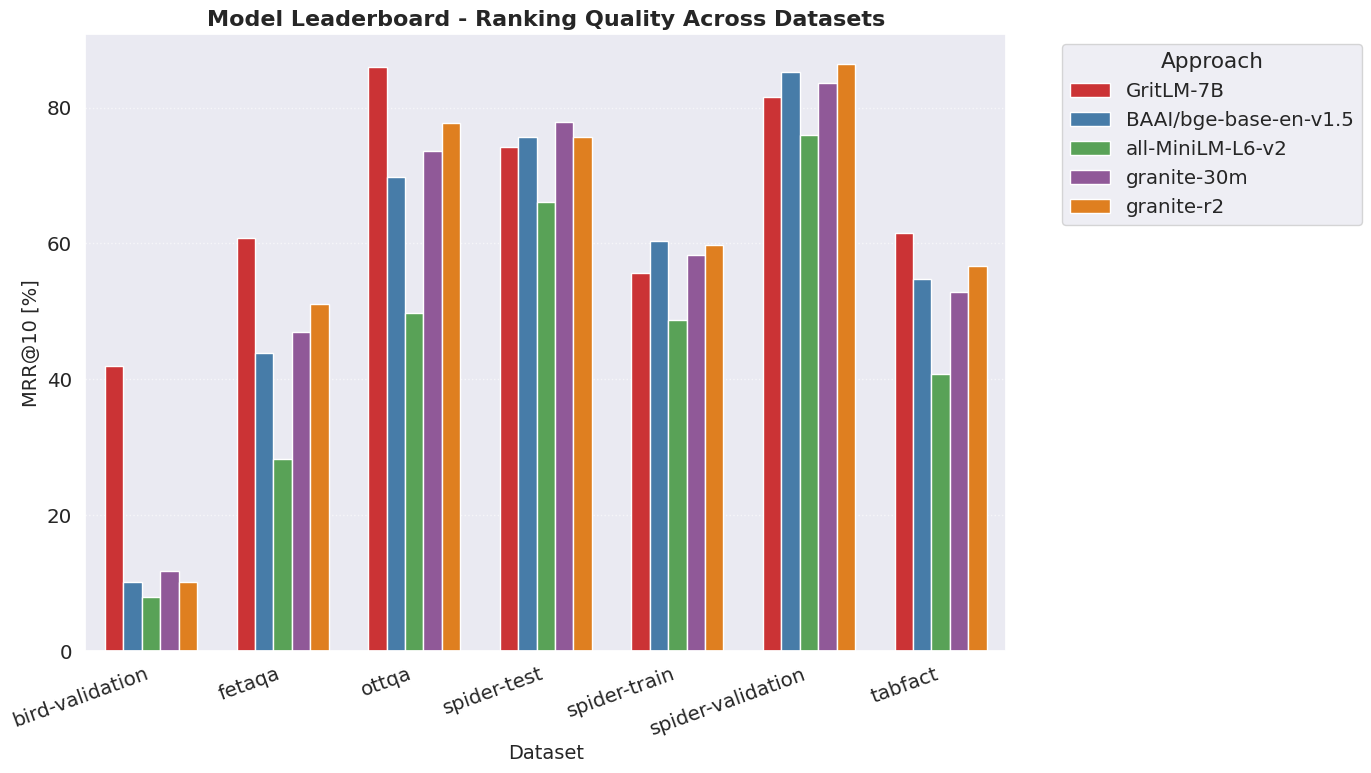

In [68]:
table_retrieval_plots.create_model_leaderboard(df=filtered_task_df, results_folder=plots_folder)
